## ExtendView Op

In [1]:
//load ImageJ
%classpath config resolver scijava.public https://maven.scijava.org/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: scijava.public


net.imagej.ImageJ@7b00c550

This `Op` wraps the `Views.extend()` method of ImgLib2, removing the borders of any `RandomAccessibleInterval` (which transforms it into a `RandomAccessible`). Let's see how it is called:

In [2]:
ij.op().help('extendView')

Available operations:
	(ExtendedRandomAccessibleInterval out) =
	net.imagej.ops.transform.extendView.DefaultExtendView(
		RandomAccessibleInterval in,
		OutOfBoundsFactory factory)

Note that this `Op` takes an [`OutOfBoundsFactory`](http://javadoc.scijava.org/ImgLib2/net/imglib2/outofbounds/OutOfBoundsFactory.html) as input. The `OutOfBoundsFactory` gives `extendValue` a strategy for populating all of the new pixels outside of the original image. Most of the classes extending `OutOfBoundsFactory` already have their own `transform.extend()` `Op`, but this `Op` can be used if you define your own, or if you are not sure beforehand on which `OutOfBoundsFactory` to use. For this notebook, however, we will just use an `OutOfBoundsFactory` that is already defined, for simplicity.

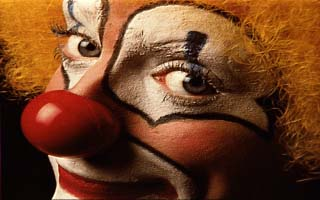

In [3]:
input = ij.scifio().datasetIO().open("http://imagej.net/images/clown.png")

ij.notebook().display(input)

Let's find a more interesting section instead of running the `Op` on the whole image:

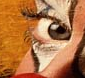

In [4]:
import net.imglib2.FinalInterval
region = FinalInterval.createMinSize(30, 17, 0, 85, 78, 3)

eye = ij.op().run("crop", input, region)

ij.notebook().display(eye)

Now that we have a smaller section, let's extend the border. We have to create an `OutOfBoundsFactory`, so let's use [`OutOfBoundsMirrorExpWindowingFactory`](http://javadoc.scijava.org/ImgLib2/net/imglib2/outofbounds/OutOfBoundsMirrorExpWindowingFactory.html), an `OutOfBoundsFactory` that mirrors the image like `extendMirror`, however after a given distance (the default is `6`, but the constructor can take any `int`) the image fades to zero. We will also use `pad` so that we can see the new pixels:

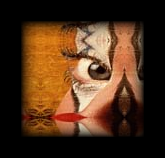

In [5]:
def pad(image, extended, t, r, b, l) {
  min = new long[image.numDimensions()]
  max = new long[image.numDimensions()]
  image.min(min)
  image.max(max)
  min[0] -= l; min[1] -= t; max[0] += r; max[1] += b
  return ij.op().run("intervalView", extended, min, max)
}

import net.imglib2.outofbounds.OutOfBoundsMirrorExpWindowingFactory
factory = new OutOfBoundsMirrorExpWindowingFactory(20)

extended = ij.op().run("extendView", eye, factory)

//let's extend our image out 20 pixels on each side
padLength = 40
padded = pad(eye, extended, padLength, padLength, padLength, padLength)

ij.notebook().display(padded)